fMRI time-series signal $x_t\in \mathbb{R}^{D \times S}$ has $t$ samples with $D$ number of ROIs and $S$ number of Subjects 

We perform only for one subject (first subject) on this case

In [30]:
import scipy.io as scio 
import numpy as np

file_path = "/root/Deep-Spatiotemporal-Variational-Bayes/data_brain/rsfmri_ori_T_232_aal_116_site_20.mat"
mat_data = scio.loadmat(file_path)
fmridata = mat_data['fmridata'] 
subject_data = fmridata[:, :, 0]

This give us 232 timesteps and 116 ROI

In [31]:
subject_data.shape

(116, 232)

We now try to understand cross power spectral density (csd).

csd(x, y, fs=1.0, window='hann', nperseg=None, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1, average='mean')[source]
Estimate the cross power spectral density, Pxy, using Welch’s method.

In [32]:
nROIs = subject_data.shape[0]
nTime = subject_data.shape[1]

To obtain a cross power spectral density tensor, we perform csd between all pairs of ROIs. We get a complex value tensor $X \in \mathbb{C}^{N \times N \times F}$

Where N is the number of ROIs. The number of frequency is based on this formula $F=⌊nperseg/2⌋+1$

In [33]:
from scipy import signal

csd_tensor = []

for i in range(nROIs):
    row = []
    for j in range(nROIs):
        f, Pxy = signal.csd(subject_data[i], subject_data[j], fs=1.0, nperseg=128)

        #store between each ROIs
        row.append(Pxy)

    #store as a tensors
    csd_tensor.append(row)

In [34]:
csd_tensor = np.array(csd_tensor) 

# Visualization - I ask chatgpt help me write :P

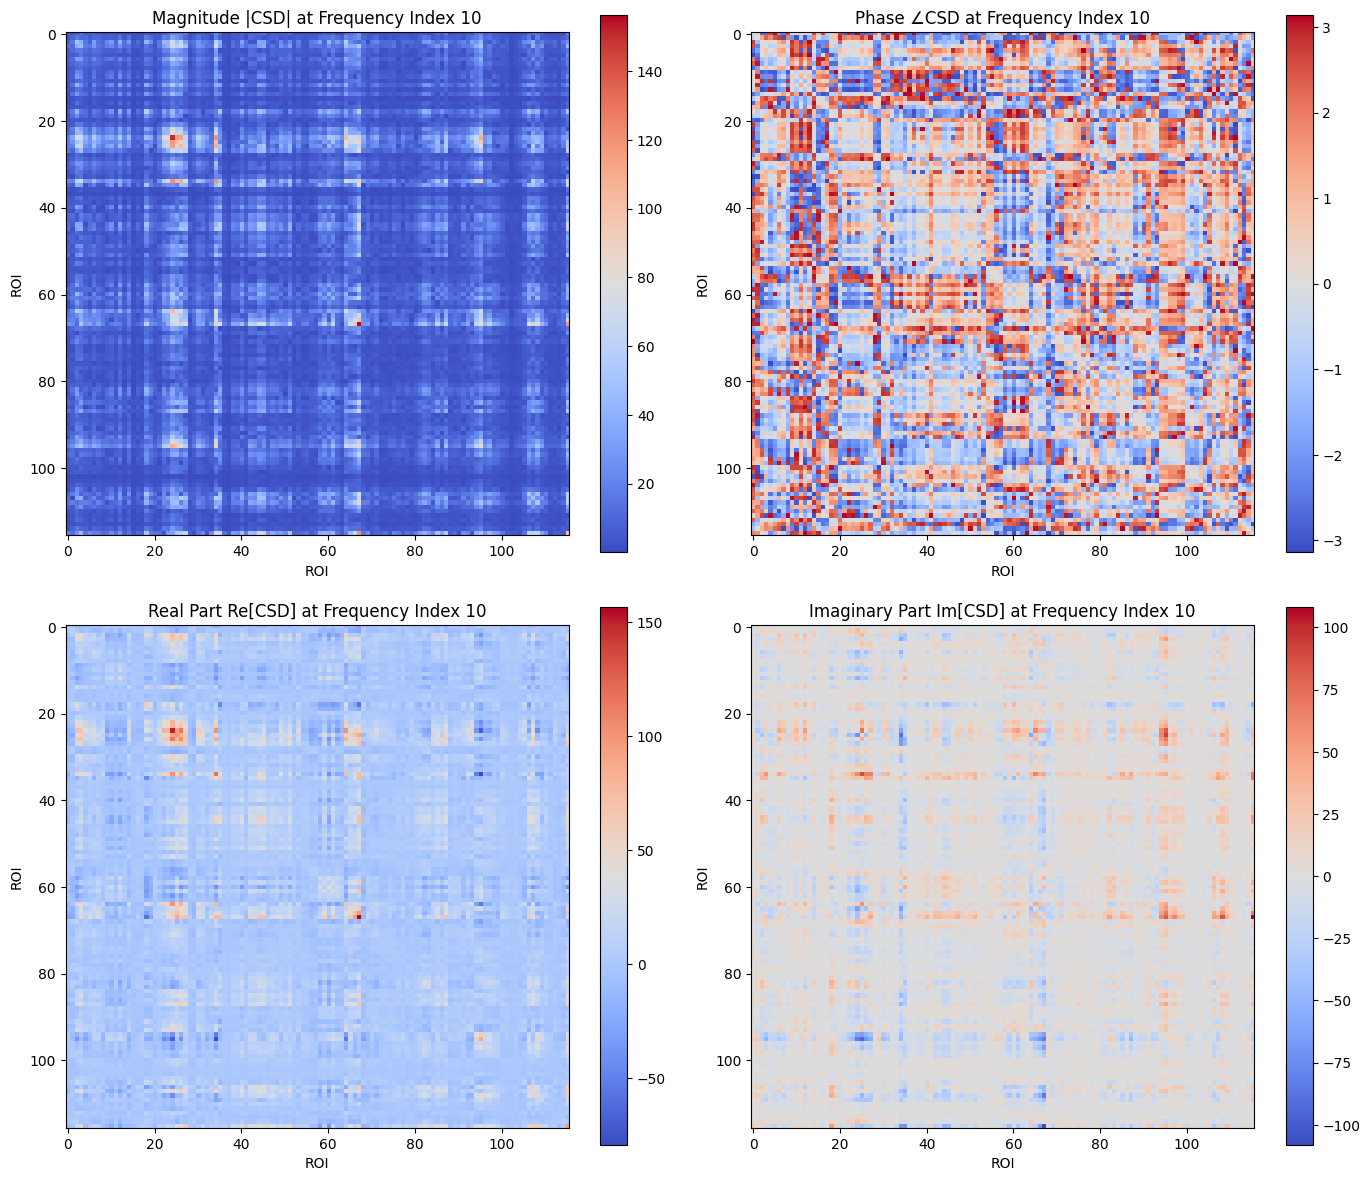

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Example input
# freq_idx = 10
# csd_tensor = ... (your computed tensor of shape [nROIs, nROIs, freq_bins])

# Extract components at selected frequency index
freq_idx = 10
magnitude_matrix = np.abs(csd_tensor[:, :, freq_idx])
phase_matrix = np.angle(csd_tensor[:, :, freq_idx])
real_matrix = np.real(csd_tensor[:, :, freq_idx])
imag_matrix = np.imag(csd_tensor[:, :, freq_idx])

# Plot all four in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Magnitude
im1 = axs[0, 0].imshow(magnitude_matrix, cmap='coolwarm')
axs[0, 0].set_title(f'Magnitude |CSD| at Frequency Index {freq_idx}')
axs[0, 0].set_xlabel('ROI')
axs[0, 0].set_ylabel('ROI')
fig.colorbar(im1, ax=axs[0, 0])

# Phase
im2 = axs[0, 1].imshow(phase_matrix, cmap='coolwarm')
axs[0, 1].set_title(f'Phase ∠CSD at Frequency Index {freq_idx}')
axs[0, 1].set_xlabel('ROI')
axs[0, 1].set_ylabel('ROI')
fig.colorbar(im2, ax=axs[0, 1])

# Real part
im3 = axs[1, 0].imshow(real_matrix, cmap='coolwarm')
axs[1, 0].set_title(f'Real Part Re[CSD] at Frequency Index {freq_idx}')
axs[1, 0].set_xlabel('ROI')
axs[1, 0].set_ylabel('ROI')
fig.colorbar(im3, ax=axs[1, 0])

# Imaginary part
im4 = axs[1, 1].imshow(imag_matrix, cmap='coolwarm')
axs[1, 1].set_title(f'Imaginary Part Im[CSD] at Frequency Index {freq_idx}')
axs[1, 1].set_xlabel('ROI')
axs[1, 1].set_ylabel('ROI')
fig.colorbar(im4, ax=axs[1, 1])

plt.tight_layout()
plt.show()


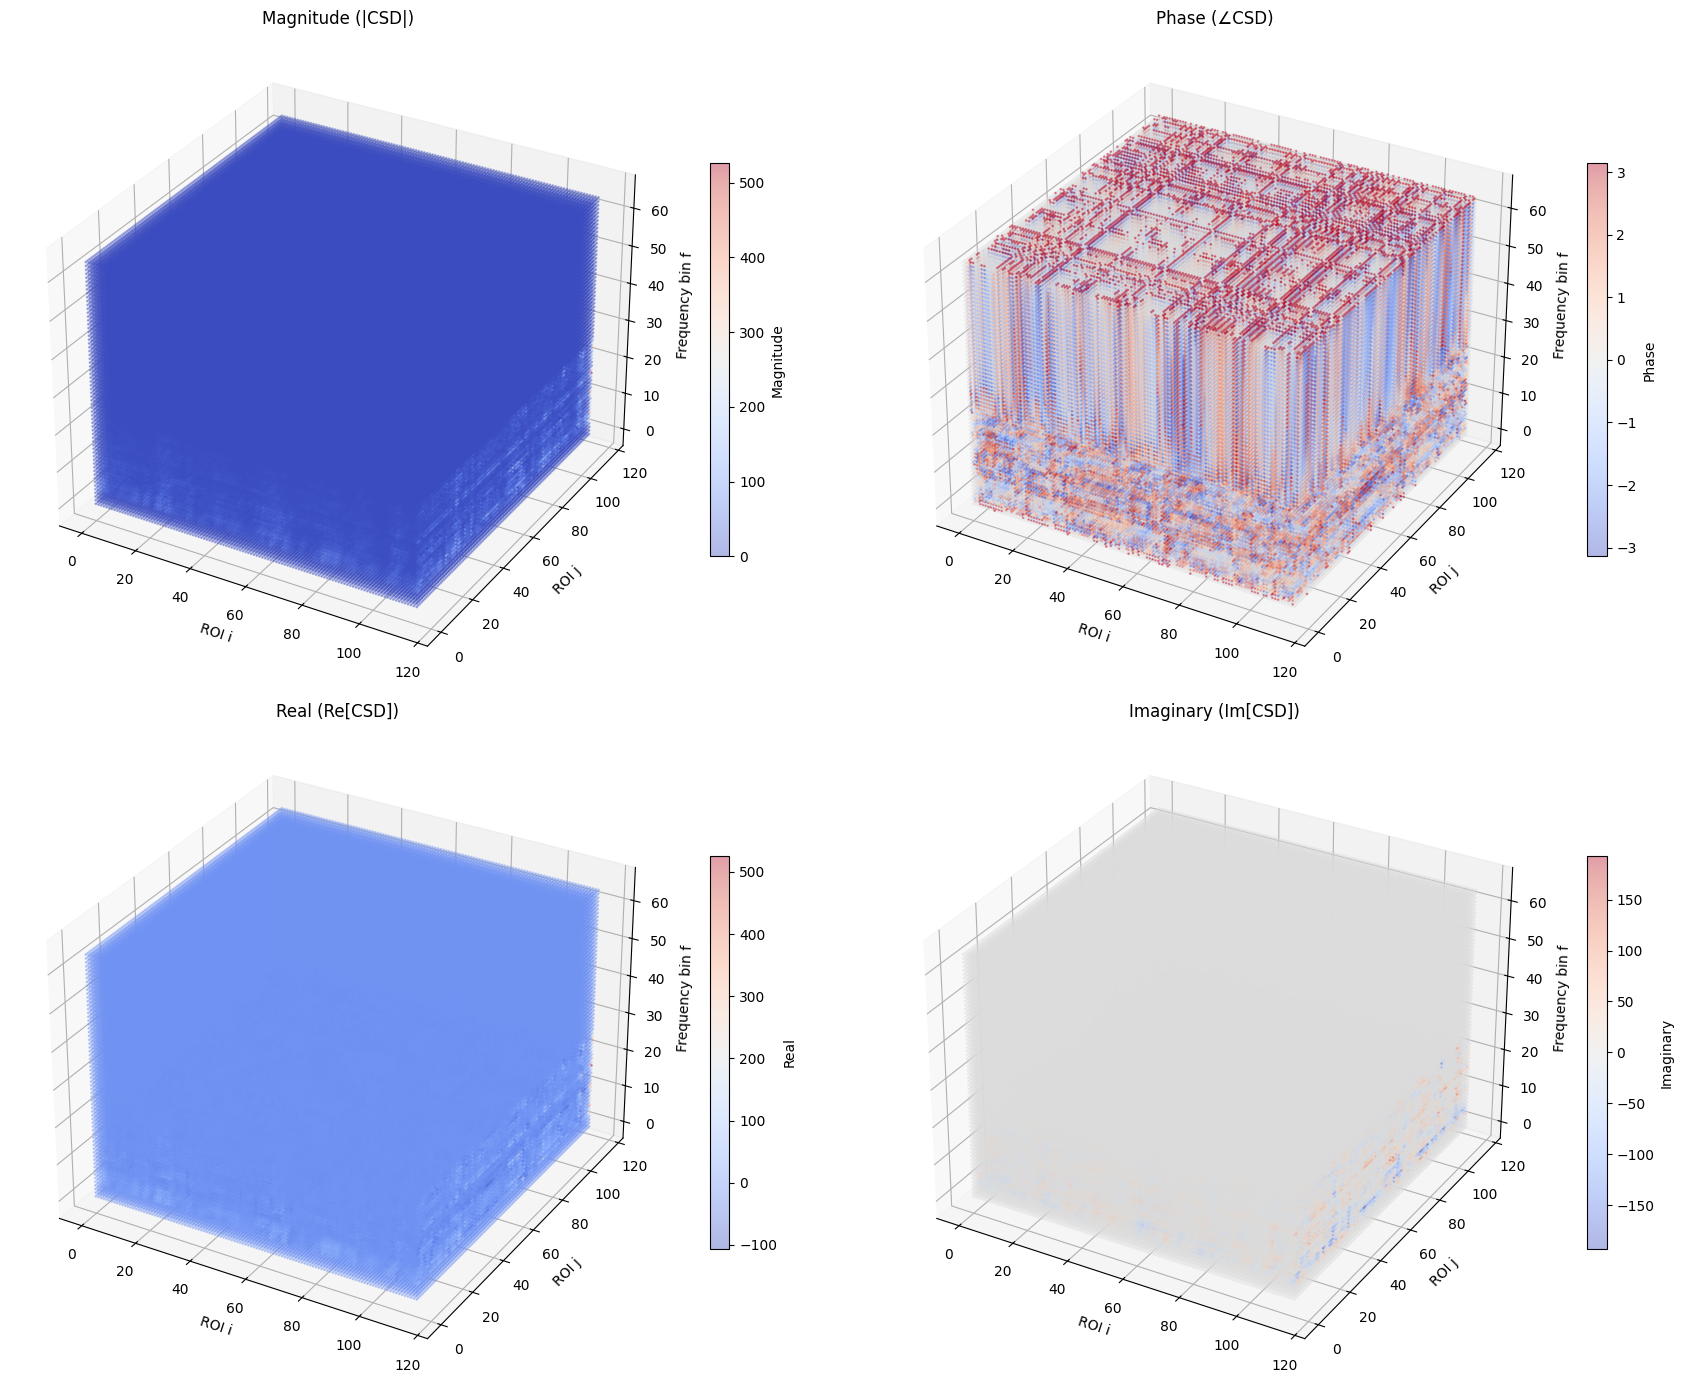

In [44]:
fig = plt.figure(figsize=(18, 14))

for i, (title, values) in enumerate(components_full.items(), 1):
    ax = fig.add_subplot(2, 2, i, projection='3d')
    p = ax.scatter(
        x_full, y_full, z_full, 
        c=values, cmap='coolwarm', 
        alpha=0.4, s=1
    )
    ax.set_title(title)
    ax.set_xlabel("ROI i")
    ax.set_ylabel("ROI j")
    ax.set_zlabel("Frequency bin f")
    fig.colorbar(p, ax=ax, shrink=0.6, label=title.split()[0])

plt.tight_layout()
plt.show()
